# Welcome to the session 10!
This jupyter notebook will contains examples, tutorials and execises.

The order of the code cell is refering to the text tutorials and lecture video. Please execute the cells one-by-one instead of run the whole notebook

# Data processing and Visualisation in Julia
## DataFrames.jl

### Installation
The DataFrames package is available through the Julia package system and can be installed using the following commands

In [1]:
using Pkg

Pkg.add("DataFrames")

using DataFrames

    Updating registry at `C:\Users\user\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
  No Changes to `C:\Users\user\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\user\.julia\environments\v1.6\Manifest.toml`


### Getting Started
#### The DataFrame Type
Objects of the DataFrame type represent a data table as a series of vectors, each corresponding to a column or variable. The simplest way of constructing a DataFrame is to pass column vectors using keyword arguments or pairs

##### Construct the DataFrame Object with initialization
In the following example, we will create a table for storing the student information

In [2]:
students = DataFrames.DataFrame(name = ["Alice", "Bob", "Chris", "Doris"], gender = ["F", "M", "M", "F"])
print(students)

4×2 DataFrame
 Row │ name    gender 
     │ String  String 
─────┼────────────────
   1 │ Alice   F
   2 │ Bob     M
   3 │ Chris   M
   4 │ Doris   F

To access the column, using the "."

In [3]:
print(students.name)

["Alice", "Bob", "Chris", "Doris"]

To access a row, using the a pair of square bracket

In [4]:
print(students[1,:])

DataFrameRow
 Row │ name    gender 
     │ String  String 
─────┼────────────────
   1 │ Alice   F

##### Construct the DataFrame Object Column by Column
It is also possible to start with an empty DataFrame and add columns to it one by one

In [5]:
students_cbc = DataFrames.DataFrame()
students_cbc.name = ["Alice", "Bob", "Chris", "Doris"]
students_cbc.gender = ["F", "M", "M", "F"]

print(students_cbc)

4×2 DataFrame
 Row │ name    gender 
     │ String  String 
─────┼────────────────
   1 │ Alice   F
   2 │ Bob     M
   3 │ Chris   M
   4 │ Doris   F

##### Construct the DataFrame Object Row by Row / Adding data
Similar to array, we can add data into the DataFrame Object with push!() function, and we can create the DataFrame Object by pushing the data into the object

In [6]:
students_rbr = DataFrames.DataFrame(name = String[], gender = String[], score = Int64[])
push!(students_rbr, ("Alice", "F", 100))
push!(students_rbr, ("Bob", "M", 65))
push!(students_rbr, ("Chris", "M", 50))
push!(students_rbr, ("Doris", "F", 40))

print(students_rbr)

4×3 DataFrame
 Row │ name    gender  score 
     │ String  String  Int64 
─────┼───────────────────────
   1 │ Alice   F         100
   2 │ Bob     M          65
   3 │ Chris   M          50
   4 │ Doris   F          40

### Working with Data Frames
The followings are the common operation with DataFrame object. We will use the large_data as example

In [7]:
large_data = DataFrame(index = 1:500, value = repeat(1:10, inner=50), value2 = 1:2:1000)

,index,value,value2
,Int64,Int64,Int64
1,1,1,1
2,2,1,3
3,3,1,5
4,4,1,7
5,5,1,9
6,6,1,11
7,7,1,13
8,8,1,15
9,9,1,17


#### first() and last()
The first and last functions can be used to look at the first and last rows of a data frame (respectively)

In [8]:
first(large_data, 5)

,index,value,value2
,Int64,Int64,Int64
1,1,1,1
2,2,1,3
3,3,1,5
4,4,1,7
5,5,1,9


In [9]:
last(large_data, 5)

,index,value,value2
,Int64,Int64,Int64
1,496,10,991
2,497,10,993
3,498,10,995
4,499,10,997
5,500,10,999


#### Create sub-DataFrame
The syntax of creating sub-DataFrame is similar with how we access the array


Example of creating sub-DataFrame with the data from row 1,3,5

In [10]:
large_data[[1,3,5], :]

,index,value,value2
,Int64,Int64,Int64
1,1,1,1
2,3,1,5
3,5,1,9


Example of creating sub-DataFrame with the column index and value

In [11]:
large_data[:, [:index, :value]]

,index,value
,Int64,Int64
1,1,1
2,2,1
3,3,1
4,4,1
5,5,1
6,6,1
7,7,1
8,8,1
9,9,1


#### Create sub-DataFrame by selecting columns
You can also use the select/select!  functions to select columns in a data frame.

The select function creates a new data frame

Example: creating new sub-DataFrame without value2 column

In [12]:
select(large_data, Not(:value2))

,index,value
,Int64,Int64
1,1,1
2,2,1
3,3,1
4,4,1
5,5,1
6,6,1
7,7,1
8,8,1
9,9,1


Example: creating new sub-DataFrame with column contains "value" string

In [13]:
select(large_data, r"value")

,value,value2
,Int64,Int64
1,1,1
2,1,3
3,1,5
4,1,7
5,1,9
6,1,11
7,1,13
8,1,15
9,1,17


#### Renaming the column
You can rename the column name by the rename!() function

In [14]:
rename!(large_data,["index", "group", "value"]) # rename columns

,index,group,value
,Int64,Int64,Int64
1,1,1,1
2,2,1,3
3,3,1,5
4,4,1,7
5,5,1,9
6,6,1,11
7,7,1,13
8,8,1,15
9,9,1,17


#### Summarizing Data
The describe function returns a data frame summarizing the elementary statistics and information about each column:

In [15]:
describe(large_data)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Int64,Float64,Int64,Int64,DataType
1,index,250.5,1,250.5,500,0,Int64
2,group,5.5,1,5.5,10,0,Int64
3,value,500.0,1,500.0,999,0,Int64


#### Missing Data
In Julia, missing values in data are represented using the special object missing, which is the single instance of the type Missing.

In [16]:
missing_data = DataFrame(name = ["Alice", "Bob", "Chris"], score = [75, missing, 40])

,name,score
,String,Int64?
1,Alice,75
2,Bob,missing
3,Chris,40


The functions dropmissing() and dropmissing!() can be used to remove the rows containing missing values from a DataFrame and either create a new DataFrame or mutate the original in-place respectively.

In [17]:
dropmissing(missing_data)

,name,score
,String,Int64
1,Alice,75
2,Chris,40


#### Joining the table
We often need to combine two or more data sets together to provide a complete picture of the topic we are studying. DataFrame supports the Database-Style join operation. We will use the following tables as the example:

In [18]:
people = DataFrames.DataFrame(ID = [1, 2], Name = ["Alice", "Bob"])
jobs = DataFrames.DataFrame(ID = [1, 3], Job = ["Lawyer", "Doctor"])
println(people)
println(jobs)

2×2 DataFrame
 Row │ ID     Name   
     │ Int64  String 
─────┼───────────────
   1 │     1  Alice
   2 │     2  Bob
2×2 DataFrame
 Row │ ID     Job    
     │ Int64  String 
─────┼───────────────
   1 │     1  Lawyer
   2 │     3  Doctor


Innerjoin: the output contains rows for values of the key that exist in all passed data frames.

In [19]:
DataFrames.join(people, jobs, on = :ID, kind = :inner)

LoadError: ArgumentError: join function for data frames is not supported. Use innerjoin, leftjoin, rightjoin, outerjoin, semijoin, antijoin, or crossjoin

Leftjoin: the output contains rows for values of the key that exist in the first (left) argument, whether or not that value exists in the second (right) argument..

In [20]:
DataFrames.join(people, jobs, on = :ID, kind = :left)

LoadError: ArgumentError: join function for data frames is not supported. Use innerjoin, leftjoin, rightjoin, outerjoin, semijoin, antijoin, or crossjoin

Rightjoin: the output contains rows for values of the key that exist in the second (right) argument, whether or not that value exists in the first (left) argument.

In [21]:
DataFrames.join(people, jobs, on = :ID, kind = :right)

LoadError: ArgumentError: join function for data frames is not supported. Use innerjoin, leftjoin, rightjoin, outerjoin, semijoin, antijoin, or crossjoin

Outerjoin: the output contains rows for values of the key that exist in any of the passed data frames.

In [22]:
DataFrames.join(people, jobs, on = :ID, kind = :outer)

LoadError: ArgumentError: join function for data frames is not supported. Use innerjoin, leftjoin, rightjoin, outerjoin, semijoin, antijoin, or crossjoin

## Importing and Exporting Data

In ML application, the data are usually stored in the files

The followings are the commonly used extension
.csv (Comma-Separated Values files)
.xls (Old version of MS Office Excel)
.xlsx (New version of MS Office Excel)

### CSV.jl
To import the data from a .csv file, we need the CSV.jl library

#### Install
Run the following cell to install CSV.jl

In [23]:
using Pkg
Pkg.add("CSV")

using CSV

   Resolving package versions...
  No Changes to `C:\Users\user\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\user\.julia\environments\v1.6\Manifest.toml`


#### Using the library
The following example is about how to read .csv file with CSV.jl

In [24]:
fileLocation = "JuliaData/application_record.csv"
file_csv_ojbect = CSV.File(fileLocation)

LoadError: ArgumentError: "JuliaData/application_record.csv" is not a valid file

Convert the CSV object to DataFrame object

In [25]:
file_df = DataFrames.DataFrame(file_csv_ojbect)

LoadError: UndefVarError: file_csv_ojbect not defined

We can export the DataFrame to .csv file for further use as well

In [26]:
example_df = DataFrame(name = ["Alice","Bob"], score = [70, 60])
export_path = "export.csv"
CSV.write(export_path, example_df)

"export.csv"

### XLSX.jl
To import the data from a Excel file, we need the XLSX.jl library

#### Install
Run the following cell to install XLSX.jl

In [27]:
using Pkg
Pkg.add("XLSX")

using XLSX

   Resolving package versions...
  No Changes to `C:\Users\user\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\user\.julia\environments\v1.6\Manifest.toml`


#### Using the library
The following example is about how to read the Excel file with XLSX.jl

In [28]:
fileLocation = "JuliaData/application_record_excel.xlsx"
example_excel_df = DataFrames.DataFrame(XLSX.readtable(fileLocation, "application_record_excel")...)
first(example_excel_df)

LoadError: AssertionError: File JuliaData/application_record_excel.xlsx not found.

## Data Visualisation in Julia
### Plot.js
Plots.jl is a powerful convenience library for visualization in Julia

### Install
Run the following cell to install Plot.js

In [29]:
import Pkg
Pkg.add("Plots")

using Plots

   Resolving package versions...
  No Changes to `C:\Users\user\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\user\.julia\environments\v1.6\Manifest.toml`


### Basic Plotting: Line Plots
In this example, we generaete a random array with 10 elements, and use the Plot.jl to plot the graph. In order to plot the graph, you need to put the data into the array

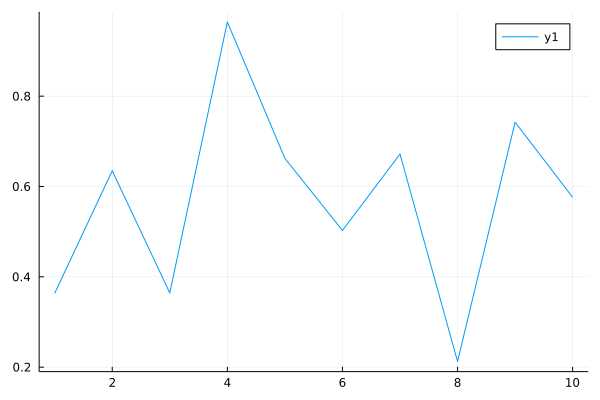

In [30]:
x = 1:10; y = rand(10) # These are the plotting data
Plots.plot(x, y)

Use plot!() to add another data on top of the above graph

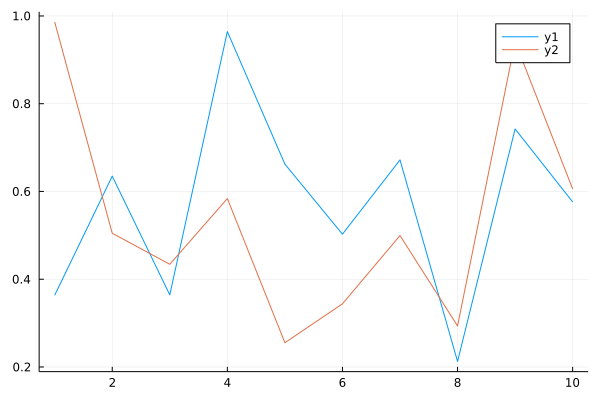

In [31]:
x = 1:10; y = rand(10); # These are the plotting data
Plots.plot!(x, y)

### Plot Attributes
We can style our plots by passing the attributes when plotting the graph. In the following example, we passed the title, label and line width when generating the graph

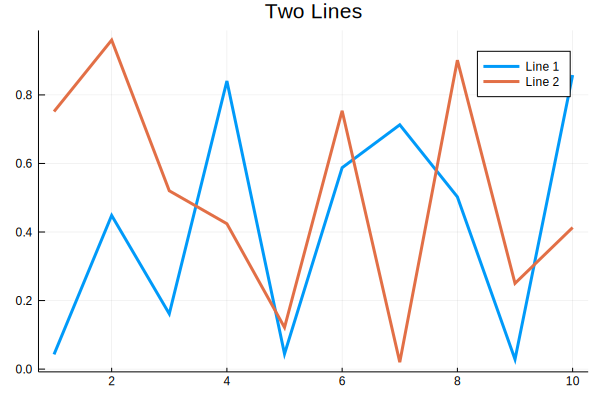

In [31]:
x = 1:10; y = rand(10, 2) # 2 columns means two lines
Plots.plot(x, y, title = "Two Lines", label = ["Line 1" "Line 2"], lw = 3)

and you can add the x,y label by the xlabel!() and ylabel!() function

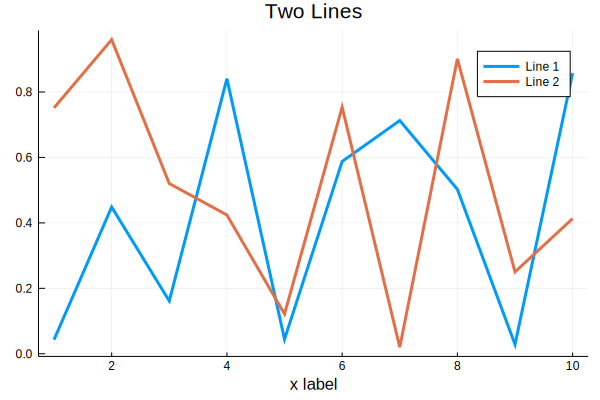

In [32]:
Plots.xlabel!("x label")

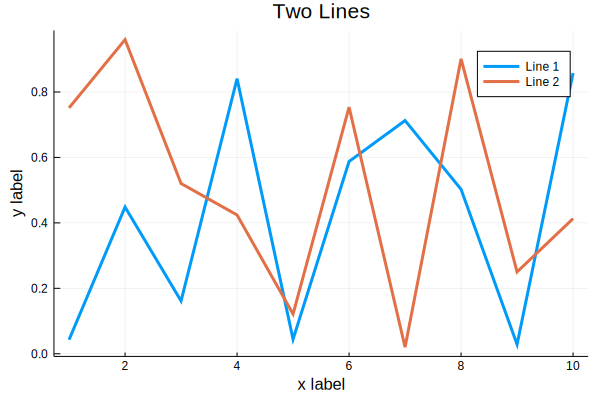

In [33]:
Plots.ylabel!("y label")

### Changing the Plotting Series
A scatter plot is another series type which is commonly used

You can plot the line plots on the scatter plot

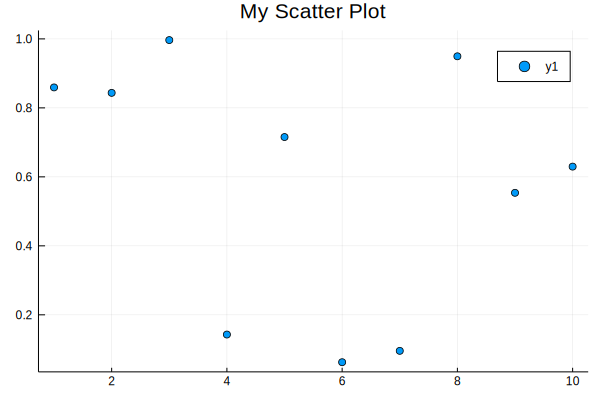

In [34]:
x = 1:10; y = rand(10)
Plots.plot(x, y, seriestype = :scatter, title = "My Scatter Plot")

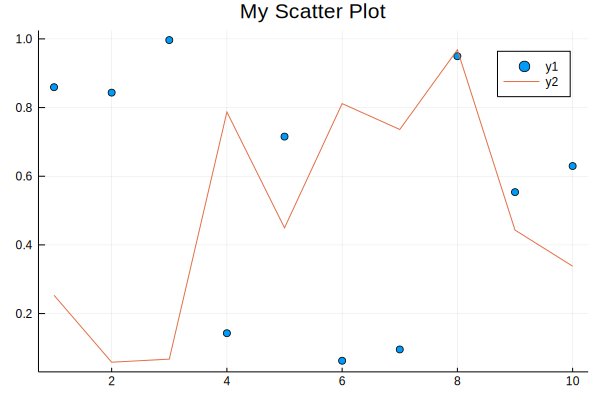

In [35]:
x = 1:10; y = rand(10); # These are the plotting data
Plots.plot!(x, y)

#### Short cut for DataFrame object
StatsPlots.jl thus has a macro @df which allows you to plot a DataFrame directly by using the column names.

Run the following cell to install StatsPlots.jl

In [ ]:
import Pkg
Pkg.add("StatsPlots")
using StatsPlots

Use @df df plot() or scatter() to plot the graph

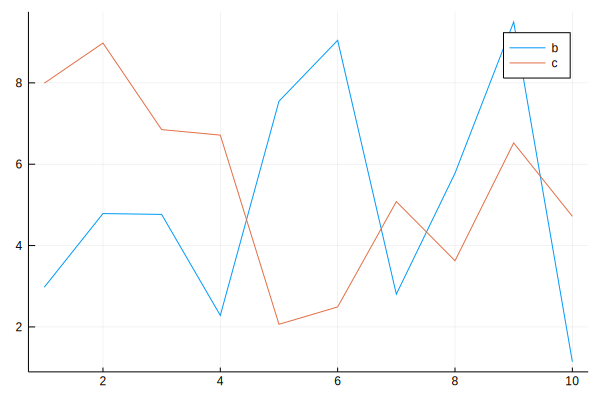

In [25]:
df = DataFrame(a = 1:10, b = 10 * rand(10), c = 10 * rand(10))
@df df plot(:a, [:b :c])

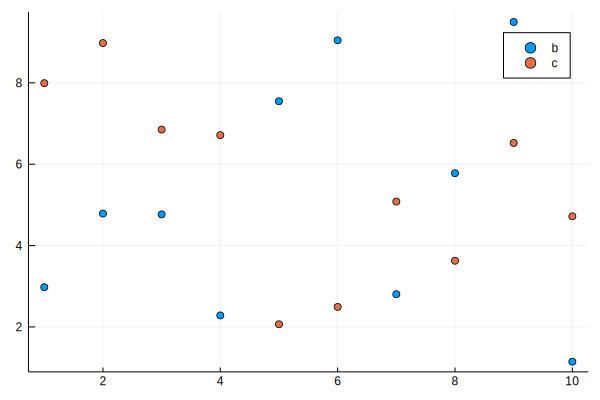

In [26]:
@df df scatter(:a, [:b :c])